# Today's topics
We will try to find out which phenotypic traits are associated with genetic markers in the BXD mouse population. This will allow us to make statements about the level of heritability of several traits as well as help us identify candidate genes responsible for specific traits.

There are several types of studies relevant in this context:

* Single gene association studies
* Genome wide association studies
* Phenome wide association studies

# GWAS background

http://www.ncbi.nlm.nih.gov/pmc/articles/PMC2736153/ contains information about how to use genenetwork.org to find coat color phenotype and correlate that to expression levels

# Useful Resources

## Books
* [James, Witten, Hastie, Tibshirani, An Introduction to Statistical Learning, Springer Texts, 2013](http://www-bcf.usc.edu/~gareth/ISL/)      
* [MacKay, Information Theory, Inference, and Learning Algorithms, Cambridge University Press, 2005](http://www.inference.phy.cam.ac.uk/itila/book.html)


## Tutorials
* [Logistic regression](http://blog.yhat.com/posts/logistic-regression-and-python.html)   
* [Linear regression](http://www.dataschool.io/linear-regression-in-python/)

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.stats as stats

# Load data
Before you can work with the data you have to load it and tidy it up a bit. This includes filtering rows with missing values, making sure that numeric columns are indeed of a numeric data type in the data frame etc.

## Load genotype data as pandas dataframe
Follow the same procedure as done yesterday. You do not have to download the file again, but can load it from your originally stored location.

In [6]:
geno_df = pd.read_csv('Day2_Files\\aad0189_DataFileS4.txt', delimiter = '\t', header = 6)
geno_df.head()

,Chr,Locus,cM,Mb,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,...,BXD90,BXD91,BXD93,BXD94,BXD95,BXD98,BXD99,BXD100,BXD101,BXD102
0,1,rs6269442,0.000,3.482275,B,B,D,D,D,B,...,B,D,B,D,D,B,B,B,B,B
1,1,rs6365999,0.000,4.811062,B,B,D,D,D,B,...,B,D,B,D,D,B,B,B,B,U
2,1,rs6376963,0.895,5.008089,B,B,D,D,D,B,...,B,D,B,D,D,B,B,B,B,U
3,1,rs3677817,1.185,5.176058,B,B,D,D,D,B,...,B,D,B,D,D,B,B,B,B,U
4,1,rs8236463,2.081,5.579193,B,B,D,D,D,B,...,B,D,B,D,D,B,B,B,B,U


## Subtask: Set SNP-ID column as index and create separate Dataframes for genotypes and locus information

In [17]:
genL_df = geno_df.set_index('Locus')
genL_df
locus_df = genL_df.iloc[:,0:3]
locus_df.head()

,Chr,cM,Mb
Locus,,,
rs6269442,1,0.000,3.482275
rs6365999,1,0.000,4.811062
rs6376963,1,0.895,5.008089
rs3677817,1,1.185,5.176058
rs8236463,1,2.081,5.579193


In [16]:
gen_only_df = genL_df.iloc[:,3:]
gen_only_df.head()

,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,BXD12,BXD13,BXD14,...,BXD90,BXD91,BXD93,BXD94,BXD95,BXD98,BXD99,BXD100,BXD101,BXD102
Locus,,,,,,,,,,,,,,,,,,,,,
rs6269442,B,B,D,D,D,B,B,D,B,B,...,B,D,B,D,D,B,B,B,B,B
rs6365999,B,B,D,D,D,B,B,D,B,B,...,B,D,B,D,D,B,B,B,B,U
rs6376963,B,B,D,D,D,B,B,D,B,B,...,B,D,B,D,D,B,B,B,B,U
rs3677817,B,B,D,D,D,B,B,D,B,B,...,B,D,B,D,D,B,B,B,B,U
rs8236463,B,B,D,D,D,B,D,D,B,B,...,B,D,B,D,D,B,B,B,B,U


## Subtask: Replace categorical data strings with numerical encoding

Use the following mapping from the categorical variable to integers.

|strain| value  |
|------|--------|
|  B   |  0     |
|  H   |  1     |
|  D   |  2     |
|  U   | missing (NAN)|

In [43]:
gen_num_df = gen_only_df.applymap({'B':0, 'D': 2, 'H':1, 'U':np.NaN}.get)
gen_num_df

,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,BXD12,BXD13,BXD14,...,BXD90,BXD91,BXD93,BXD94,BXD95,BXD98,BXD99,BXD100,BXD101,BXD102
Locus,,,,,,,,,,,,,,,,,,,,,
rs6269442,0,0,2,2.0,2,0,0,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,0.0
rs6365999,0,0,2,2.0,2,0,0,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,NaN
rs6376963,0,0,2,2.0,2,0,0,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,NaN
rs3677817,0,0,2,2.0,2,0,0,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,NaN
rs8236463,0,0,2,2.0,2,0,2,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,NaN
rs6333200,0,0,2,2.0,2,0,2,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,NaN
rs6298633,0,0,2,2.0,2,0,2,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,NaN
rs6241531,0,0,2,2.0,2,0,2,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,2.0
rs6360236,0,0,2,2.0,2,0,2,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,2.0


## Optional: Drop rows with unknown genotypes


## Alternative: Keep unknown values, work around them whenever necessary

In [44]:

gen_num_df = gen_num_df.dropna(axis = 0, how = 'any')
gen_num_df.head()

,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,BXD12,BXD13,BXD14,...,BXD90,BXD91,BXD93,BXD94,BXD95,BXD98,BXD99,BXD100,BXD101,BXD102
Locus,,,,,,,,,,,,,,,,,,,,,
rs6269442,0,0,2,2.0,2,0,0,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,0.0
rs6241531,0,0,2,2.0,2,0,2,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,2.0
rs6360236,0,0,2,2.0,2,0,2,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,2.0
rs3722996,0,0,2,2.0,2,0,2,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,2.0
D1Mit1,0,0,2,2.0,2,0,2,2,0,0,...,0.0,2,0,2.0,2,0,0,0,0.0,2.0


## Download categorical data from genenetworks.org

Most mouse phenotype data is available at genenetwork.org. This includes nearly all published phenotype measurements. You can access individual measurements from that repository using the search mask:
1. Go to http://gn2.genenetwork.org/
2. In "Select and Search" fill in:
    1. Species: Mouse
    2. Group: BXD RI Family
    3. Type: Phenotypes
    4. Dataset: BXD Published Phenotypes
3. Enter the trait of interest in the "Get any" field
4. Search

For getting data on the coat color of BXD mice use "coat color" as search term and select the Record 11280 to get to the corresponding __Trait Data and Analysis__ page. There you can download the data as text file.

## Load phenotype data (coat color)

From the source of the genotype data we know the mapping between the categorical color value
and the actual color. Keep an eye out for missing values and remove them.

|color  | value  |
|-------|--------|
| black |  4     |
| grey  |  3     |
| brown |  2     |
| dilute|  1     |

In [93]:
coat_df = pd.read_csv('day2_FIles\\mouse_coat_color.csv', header = None, na_values ='x')
coat_df.columns =['strain', 'value']
coat_df = coat_df.set_index('strain')
#coat_df_col = coat_df.applymap({4.: 'black', 3.: 'grey', 2.0:'brown', 1.0:'dilute'}.get)
coat_df.head()
#coat_df = coat_df.astype(int)
#np.dtype(coat_df.iloc[0,0])

,value
strain,
C57BL/6J,4.0
DBA/2J,1.0
B6D2F1,4.0
D2B6F1,4.0
BXD1,1.0


# Association tests between variant(s) and categorical phenotype
We will first start testing SNPs for their association with an easily characterizable phenotype: coat color. As you could see in the slides, BXD mice come in different colors (black, brown, dilute) and as you know, hair color is heritable. In this task you will thus try to find candidate genes that are involved in coat color determination in the mouse population.

Note: Nearly all coat color variability in BXD mice has been associated with three genes: _Tyrp1_(brown, chr 4), _Myo5a_ (dilute, chr 9) and _Asip_ (non-agouti, i.e. one color) ([PMC2736153](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC2736153)). We will now check if we see this association using the 3700 SNPs in our genotype. Remember this for the literature search at the end!

## Task: Perfom association test for a single SNP using $\chi^2$ test and odds ratio

### Subtask: Extract the row of a single SNP (use rs6232550)

In [69]:
loc = gen_num_df.loc['rs6232550']

### Subtask: Combine SNP data with phenotype data

In [82]:
loc_comb_df = pd.concat([loc, coat_df], join ='inner', axis = 1)
loc_comb_df.head()


,rs6232550,value
BXD1,2.0,1.0
BXD2,0.0,4.0
BXD5,0.0,3.0
BXD6,0.0,3.0
BXD8,0.0,3.0


### Subtask: Plot relationship between genotye and phenotype

you can use a scatter plot, but equal values will occlude each other <br>
hint: add a jitter by adding a random sample from [-x,x] for some x < 0.5 to each value

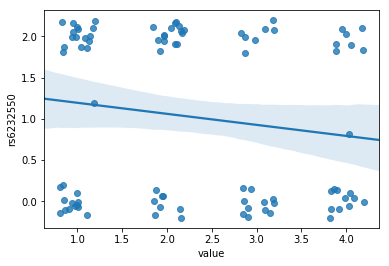

In [91]:
ax = sns.regplot(x='value', y='rs6232550', data=loc_comb_df, x_jitter = 0.2, y_jitter= 0.2);

### Subtask: Create contingency table for a D-dominant (!) inheritance model of black coat color and SNP rs6232550
Tip: pandas' crosstab functionality may be helpful here and the [reshaping/crosstab documentation](http://pandas-docs.github.io/pandas-docs-travis/reshaping.html) as illustrated in [this tutorial](http://wesmckinney.com/blog/contingency-tables-and-cross-tabulations-in-pandas/) may be helpful.

In [108]:
#D=2, B=0
#Black : 4

cont_tab = pd.crosstab(loc_comb_df['value'] == 4, loc_comb_df['rs6232550'] > 0)
cont_tab

rs6232550,False,True
value,,
False,33,41
True,11,8


### Subtask: Perform $\chi^2$ square test for independence on the contingency table

In [109]:
chi2, p, dof, ex = stats.chi2_contingency(cont_tab)
print(p)

0.43644104760569435


As the p-value is quite large, that tells us, that the parameters we tested are independent.

### Subtask: Write function to calculate odds ratio from a contingency table --> Ignore Task!

## Task: extend statistical method for a penetrance model in which increasing numbers of A alleles confer a trend in risk (e.g. additive or dominant)

While you can model most of the penetrance models described in the lecture in a 2x2 contingency table and thus perform a $\chi^2$ test with one degree of freedom, it may sometimes be useful to consider the full complexity of a genotype considering all three possible genotypes instead of just two (even though the latter has larger statistical power). Apart from a $\chi^2$ test with two degrees of freedom, the Cochran–Armitage trend test is commonly used in genetic association tests as this has often larger statistical power. In this case, if the exact model of penetrance is not known, an additive approach is often used. 

You can read more about basic statistical approaches in genetic association tests in the following paper:

__G. Clarke et al.       
[Basic statistical analysis in genetic case-control studies](http://www.nature.com/nprot/journal/v6/n2/full/nprot.2010.182.html)__,      
Nat. Protocols, 2011/02,     
http://dx.doi.org/10.1038/nprot.2010.182


### Subtask: Given the data you have, could you theoretically calculate this type of statistic for your data? Does it make sense to do this with this data?

* If yes, please implement the creation of a contingency table and the test.
* If no, please explain why.

In our case we have the two homozygote alleles as well as heterozygotes, so in total 3 different possible genotypesfor one locus. In the chi test we assumed a dominant allele, which is why we combined one heterozygote and homzygote into one group. This way we ended up with two groups for the chi square test.
So in this case our alternative would be to take three groups : 2 homozygotes and 1 heterozyote
However there are only 2 heterozygote individuals. The statistical power is almost none for a sample size of 2. That's why a three dimensional test does not make sense in this case

## Task: Refactor previous analysis steps into a function and apply to all SNPs

Things to consider:
* What information is needed as input in each round?
* Do you want to support $\chi^2$ and Cochran–Armitage test?
* What information as output is needed? (What information from each test do you need for the following tasks?)
* Should multiple inheritance models be included?
* Should the user get to choose which hair color to test?
* Can you do this without iterating over all SNPs independently? Can you calculate ALL contingency table values at once?

How many SNPs are significantly associated with coat color with a significance threshold $\alpha$ of 5% without correction for multiple hypothesis testing?

In [160]:
coat_df_t = coat_df.T
all_df = pd.concat([gen_only_df, coat_df_t]).dropna(axis = 1)
coat_cut = all_df.loc['value']
gen_only_df_cut = all_df.drop(index='value')
gen_only_df_cut = gen_only_df_cut.applymap({'B':0, 'D': 2, 'H':1, 'U':np.NaN}.get)


In [158]:

p_val_list = []
is_significant = []
boo_coat = coat_cut == 4

for i, loc_key in enumerate(gen_only_df_cut.index.tolist()):
    curr_loc = gen_only_df_cut.loc[loc_key]
    cont_tab = pd.crosstab(loc_comb_df['value'] == 4, curr_loc > 0)
    chi2, p, dof, ex = stats.chi2_contingency(cont_tab)
    p_val_list.append(p)
    is_significant.append(p < 0.05) #Not statistically valid; some will be false positives by chance!!
    

In [166]:
p_val_df = pd.DataFrame(p_val_list, index = gen_only_df_cut.index.tolist())
is_significant_df = pd.DataFrame(is_significant, index = gen_only_df_cut.index.tolist())
p_val_df


,0
rs6269442,0.023772
rs6365999,0.023772
rs6376963,0.101713
rs3677817,0.125882
rs8236463,0.366267
rs6333200,0.366267
rs6298633,0.187166
rs6241531,0.154235
rs6360236,0.081323
rs3722996,0.081323


### Subtask: Create Manhattan Plot of  $-\log_{10}(\text{P-value})$ vs chromosome position 
A Manhattan plot, named after its resemblance to the skyline of Manhattan, is commonly used to plot the p-value obtained for individual association tests for each SNP compared to the SNP's position on the genome as shown in the example below.

Technically, a Manhattan plot is a scatter plot of genome position (for each chromosome) vs the negative logarithm of the p-value.

Try to approximate the following plot as closely as possible (it should be possible to see precisely which chromosome each ) :

<img src='Manhattan.png'>

## Task: Correction for Multiple Hypothesis Testing

### Preliminary subtask: p-value histograms

Plot a histogram of all the p-values that you got from the $\chi^2$ tests. Generate the same amount of random uniformly distributed values between [0,1], and put them on the same histogram for comparison. (This is what a well-calibrated statistical test would produce if there was no association between two random variables.)
Will any of our p-values survive multiple testing correction in your opinion? If necessary, increase the number of bins to catch any differences between the two histograms near p=0. <br>
Will any of our p-values survive multiple testing correction in your opinion? If, so, try to guess how many! 

### Subtask: Employ the Benjamini-Hochberg correction method described in the lecture to take care of the multiple hypothesis testing.
Add the raw and corrected p-values to the locus information dataframe as additional columns.<br>
After B-H correction, how many SNPs stayed significantly associated with coat color at the p<0.05 level? Compare this number with your earlier guess based on the raw p-value histogram. 

In [46]:
from statsmodels.sandbox.stats.multicomp import multipletests

### Subtask: Test if the function works as intended
Plot a histogram of the corrected p-values.
Since you already have a method to create it, make a manhattan plot with the corrected p-values this time.


## Task: Identify candidate genes from identified loci

### Subtask: Identify genes in region identified by significant loci (consider each chromosome separately)

What we identified so far are trait associated SNPs. This does not mean there is directly a causal relationship between the markers identified in the association study and the phenotype. It is, however, a pointer towards the region of the genome that may be relevant for the variability in the measured trait. The genes encompassed in this region then need to be analysed further to identify viable mechanistic candidates.



A good starting point for this fine grained analysis would be to look up the genes directly linked to the SNP in a mouse genome database (e.g, http://www.informatics.jax.org/snp/ ).

Most likely the high ranking SNPs will not map directly to the causal gene, but will rather be a marker for another variant in a gene in __linkage disequilibrium__ with this SNP. We thus need to extend the search and look at other genes in the vicinity of the high ranking SNPs.

Also, the database mentioned above does not cover the BXD strains, and therefore does not contain the SNP IDs we have.
But it does cover the BXD parent strains C57BL/6J and DBA/2J ( http://www.genenetwork.org/dbdoc/BXDGeno.html , http://www.genenetwork.org/mouseCross.html ). Use these strains and the Mb (Mega bases) column of the genotype data to search the genomic regions around the SNPs.

You may also want to move on the [Biomart](http://www.ensembl.org/biomart/martview/fb0e89930dcbbdb8075ca52f8b196719) to query for genes in a genomic region.

A third resource you may want to check out is the [UCSC Genome Browser](http://genome.ucsc.edu/) for visual explorations as well as the [UCSC Table Browser](http://genome.ucsc.edu/cgi-bin/hgTables?hgsid=511555905_oFRLEcH1IWO1FdKyzynrsBCRMk7w) to obtain genes in a genomic region. The identifiers of proteins in the [uniprot](http://www.uniprot.org/) database are listed in the resulting table. Uniprot then can provide useful annotations of the proteins found in the search frame.

Programmatic access is possible for all the services above using their REST interfaces:  

[UCSC](http://genomewiki.ucsc.edu/index.php/Programmatic_access_to_the_Genome_Browser)     
[Biomart](http://www.ensembl.org/info/data/biomart/biomart_restful.html)     
[Uniprot](http://www.uniprot.org/help/programmatic_access)      

But python support is limited, so it's fine if you use the websites directly.

### Subtask: Check if the locations you found match to what is known from literature about genetics of mouse coat color 
(reminder:  _Tyrp1_(brown, chr 4), _Myo5a_ (dilute, chr 9) and _Asip_ (yellowish, chr 2); check how close your significant SNPs are to these genes)